#  `Fait Tail` Location Parameter Estimation
- This work relies on synthetic data

In [37]:
# uncomment the following if you need to download the packages
import Pkg; 
#Pkg.add("RobustMeans")
#Pkg.add("Distributions")
#Pkg.add("StatsPlots")
#Pkg.add("LaTeXStrings")
#Pkg.add("OutlierDetection")
#Pkg.add("BenchmarkTools")
#Pkg.add("MLJ")
#Pkg.add("PGFPlotsX")
#Pkg.add("PythonCall")
#Pkg.add("StatisticalMeasures")
#Pkg.add("OutlierDetectionData")
#Pkg.add("Images")
using Distributions
using RobustMeans
using StatsPlots
using PGFPlotsX
using Images
using LaTeXStrings
# To have nice LaTeX font plots.
using StatsPlots, LaTeXStrings
# adding pythoncall to the path
ENV["JULIA_PYTHONCALL_EXE"] = raw"C:\Users\Shayan\AppData\Local\Programs\Python\Python"

"C:\\Users\\Shayan\\AppData\\Local\\Programs\\Python\\Python"

#### Let us have a look at this Weibull distribution

The mean is 2.0
The variance is 20.0


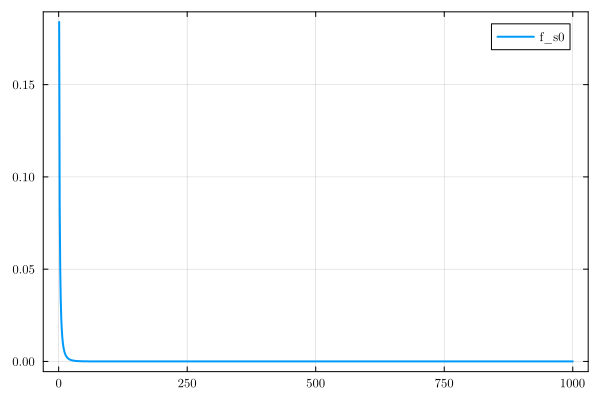

In [31]:
# choosing alpha and theta similar to the paper
α = 0.50
θ = 1
println("The mean is ",mean(Weibull(α,θ)))
println("The variance is ",var(Weibull(α,θ)))

# let us have a quick look at the distribution
vᵤ = 0:1:1000
f_s0 = pdf.(Weibull(α,θ), vᵤ) # uniform distribution with area 1
plot(vᵤ, f_s0, label="f_s0", framestyle=:box)

In [47]:
n = 8 * 7
M = 10^5 # M = 10^7 is used for the plot
distribution = Weibull(α,θ)
μ = mean(distribution); # True mean
σ = std(distribution); # True std
x = rand(distribution, M, n); # M realization of samples of size n

In [33]:
# Store all the realizations into a Dictionary
p = 1 # Parameter of MinskerNdaoud
δ = 3exp(-8) # 0.001
estimators = [EmpiricalMean(), Catoni(σ), Huber(σ), LeeValiant()]
short_names = ["Empirical Mean", "Catoni Mean", "Huber Median-of-Means", "Lee Valiant Mean"]
estimates = Dict{MeanEstimator,Vector}()
for estimator in estimators
    estimates[estimator] = [mean(r, δ, estimator) for r in eachrow(x)]
    end

#### Let us plot the empirical location via the Central Limit Theorem

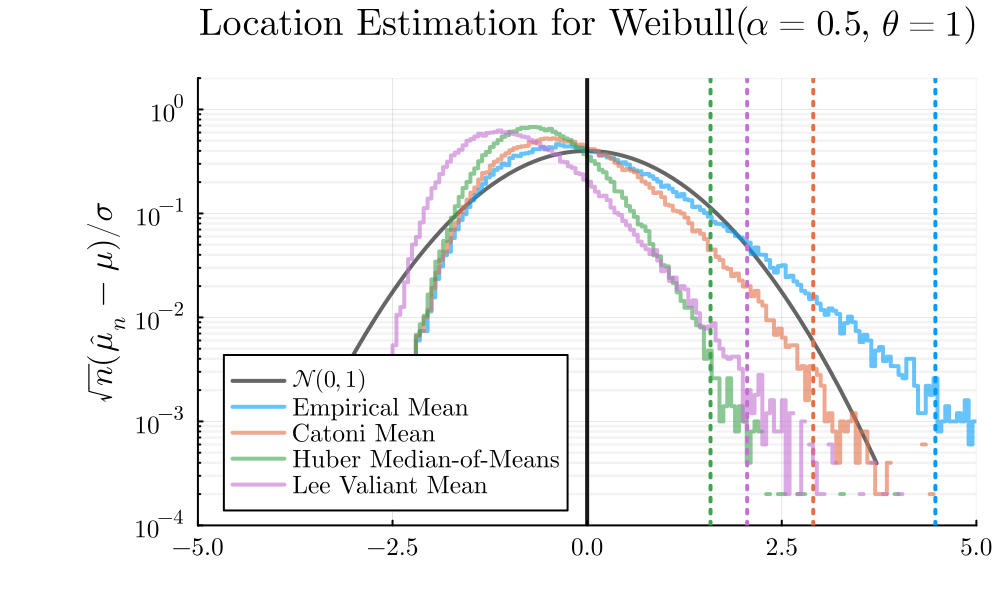

In [45]:

gr()
plot_font = "Computer Modern"
default(
    fontfamily = plot_font,
    linewidth = 2,
    label = nothing,
    grid = true,
    framestyle = :default
)
# The plot 
plot(thickness_scaling = 2, size = (1000, 600), title = L"Location Estimation for Weibull($\alpha=0.5$, $\theta=1$)",
            titlefont = font(12,"Computer Modern"))
plot!(Normal(), label = L"\mathcal{N}(0,1)", c = :black, alpha = 0.6, linewidth=2)
for (ns, s) in enumerate(estimators)
    W = √(n) * (estimates[s] .- μ) / σ
    stephist!(W, alpha = 0.6, norm = :pdf, label = short_names[ns], c = ns, linewidth=2)
    vline!([quantile(W, 1-δ)], s = :dot, c = ns, linewidth=2)
end

vline!([0], label = :none, c = :black, lw = 2, alpha = 0.9)
yaxis!(:log10, yminorticks = 9, minorgrid = :y, legend = :bottomleft, minorgridlinewidth = 1.2)
ylims!((1/M*10, 2))
ylabel!(L"\sqrt{n}(\hat{\mu}_n-\mu)/\sigma", tickfonthalign = :center)
xlims!((-5, 5))
yticks!(10.0 .^ (-7:-0))


We observe that Huber's median of means produces a much better location estimate than the empirical mean or other more complex approach such as Catoni's mean or Lee-Valiant' mean estimates.

In [46]:
#savefig("../Explainer/images/robust_means.png")

"D:\\Personal\\Imperial College\\Courses\\Ethics for AI\\part 3\\Explainer\\images\\robust_means.png"